# Clustering

Clustering is an example of unsupervised learning, in which we work with completely unlabeled data (or in which our data has labels but we ignore them).

Whenever you look at some source of data, it’s likely that the data will somehow form clusters. 
- A data set showing where millionaires live probably has clusters in places like Beverly Hills and Manhattan. 
- A data set showing how many hours people work each week probably has a cluster around 40 (and if it’s taken from a state with laws mandating special benefits for people who work at least 20 hours a week, it probably has
another cluster right around 19). 
- A data set of demographics of registered voters likely forms a variety of clusters (e.g., “soccer moms,” “bored retirees,” “unemployed millennials”) that pollsters and political consultants likely consider relevant.

Unlike some of the problems we’ve looked at, **there is generally no “correct” clustering**. An alternative clustering scheme might group some of the “unemployed millenials” with “grad students,” others with “parents’ basement dwellers.” Neither scheme is necessarily more correct—instead, each is likely more optimal with respect to its own “how good are the clusters?” metric.
Furthermore, the clusters won’t label themselves. You’ll have to do that by looking at the data underlying each one.

## The model

For us, each input will be a **vector in d-dimensional space** (which, as usual, we will represent as a list of numbers). Our **goal will be to identify clusters of similar inputs** and (sometimes) to find a representative value for each cluster.
For example, each input could be (a numeric vector that somehow represents) the title of a blog post, in which case the goal might be to find clusters of similar posts, perhaps in order to understand what our users are blogging about. Or imagine that we have a picture containing thousands of (red, green, blue) colors and that we need to screen-print a 10-color version of it. Clustering can help us choose 10 colors that will minimize the total “color error.”
One of the **simplest clustering methods** is **k-means**, in which the number of clusters k is chosen in advance, after which the goal is to partition the inputs into sets S 1 , ..., S k in a way that minimizes the total sum of squared distances from each point to the mean of its assigned cluster.
There are a lot of ways to assign n points to k clusters, which means that finding an optimal clustering is a very hard problem. We’ll settle for an iterative algorithm that usually finds a good clustering:

1. Start with a set of k-means, which are points in d-dimensional space.
2. Assign each point to the mean to which it is closest.
3. If no point’s assignment has changed, stop and keep the clusters.
4. If some point’s assignment has changed, recompute the means and return to step 2.

In [32]:
from linear_algebra import squared_distance, vector_mean, distance
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

class KMeans:
    """performs k-means clustering"""

    def __init__(self, k):
        self.k = k          # number of clusters
        self.means = None   # means of clusters

    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs):

        self.means = random.sample(inputs, self.k)
        assignments = None

        while True:
            # Find new assignments
            new_assignments = list(map(self.classify, inputs))

            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return

            # Otherwise keep the new assignments,
            assignments = new_assignments

            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # avoid divide-by-zero if i_points is empty
                if i_points:
                    self.means[i] = vector_mean(i_points)


## Exaple: Meetups

To celebrate DataSciencester’s growth, your VP of User Rewards wants to organize several in-person meetups for your hometown users, complete with beer, pizza, and DataSciencester t-shirts. You know the locations of all your local users (Figure 19-1), and she’d like you to choose meetup locations that make it convenient for everyone to
attend.
Depending on how you look at it, you probably see two or three clusters. (It’s easy to do visually because the data is only two-dimensional. With more dimensions, it would be a lot harder to eyeball.)
Imagine first that she has enough budget for three meetups. You go to your computer and try this:

Cluster means [[-25.857142857142854, -4.714285714285714], [20.0, 26.0], [16.666666666666664, 13.666666666666666]]


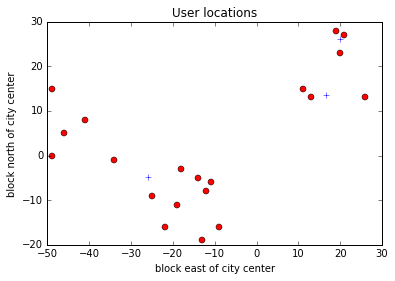

In [33]:
def plot_cluster(inputs, means):
    plt.plot(*zip(*inputs), marker='o', color='r', ls='')
    plt.plot(*zip(*means), marker='+', color='b', ls='')
    plt.title('User locations')
    plt.xlabel('block east of city center')
    plt.ylabel('block north of city center');


inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],
          [-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

random.seed(0)

cluster = KMeans(3)
cluster.train(inputs)
means = cluster.means
print("Cluster means", means)
plot_cluster(inputs, means)

Cluster means [[-25.857142857142854, -4.714285714285714], [18.333333333333332, 19.833333333333332]]


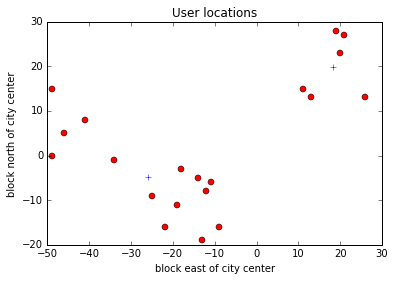

In [34]:
cluster = KMeans(2)
cluster.train(inputs)
means = cluster.means
print("Cluster means", means)
plot_cluster(inputs, means)

As shown in Figure 19-3, one meetup should still be near [18, 20], but now the other should be near [-26, -5].

## Choosing k

In the previous example, the choice of k was driven by factors outside of our control.
In general, this won’t be the case. There is a wide variety of ways to choose a k. One that’s reasonably easy to understand involves plotting the **sum of squared errors** (between each point and the mean of its cluster) as a function of k and looking at where the graph “bends”:

In [35]:
def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = list(map(clusterer.classify, inputs))

    return sum(squared_distance(input,means[cluster])
               for input, cluster in zip(inputs, assignments))


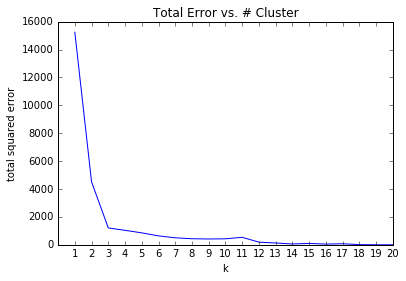

In [36]:
ks = range(1, len(inputs)+1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('total squared error')
plt.title('Total Error vs. # Cluster')
plt.show()

Looking at Figure 19-4, this method agrees with our original eyeballing that 3 is the “right” number of clusters.